In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'
%reload_ext lab_black

In [2]:
import matplotlib.pyplot as plt
import random
import numpy as np
import seaborn as sns
import pickle

sns.set_context("talk")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from matplotlib.cm import ScalarMappable
from matplotlib.colors import ListedColormap
from scipy.stats import pearsonr

### load processed data

In [3]:
with open("../../Processed-Data/sweep_replay_correlation_realdata.pkl", "rb") as f:
    (
        animal_names,
        all_sweep_len_perday_concat,
        all_sweep_amp_perday_concat,
        all_sweep_ahead_perday_concat,
        all_sweep_behind_perday_concat,
        all_exponent_perday_concat,
        all_ave_activespeed_perday_concat,
    ) = pickle.load(f)

### shuffle 

In [5]:
def get_corrcoef_and_p(
    all_exponent_perday_concat, all_sweep_len_perday_concat, animal_names
):

    # for each key in all_exponent_perday_concat, shuffle the values in the list
    # store the shuffled values in a new dictionary
    all_exponent_perday_concat_shuffled = {}
    # for key in all_exponent_perday_concat.keys():
    #     all_exponent_perday_concat_shuffled[key] = np.random.permutation(
    #         all_exponent_perday_concat[key]
    #     )
    for key in all_exponent_perday_concat.keys():
        exp_key = all_exponent_perday_concat[key]
        exp_key_copy = exp_key.copy()
        # for each elemet in exp_key, replace it with another element in exp_key
        for i in range(len(exp_key_copy)):
            exp_key_except_i = exp_key[:i] + exp_key[i + 1 :]
            exp_key_copy[i] = random.choice(exp_key_except_i)
        all_exponent_perday_concat_shuffled[key] = exp_key_copy

    # copy all_sweep_len_perday_concat to a new dictionary
    all_sweep_len_perday_concat_shuffled = all_sweep_len_perday_concat.copy()

    exp_np = np.concatenate(list(all_exponent_perday_concat_shuffled.values()))
    sweep_len_np = np.concatenate(list(all_sweep_len_perday_concat_shuffled.values()))

    # pearson test
    corr, p = pearsonr(sweep_len_np, exp_np)

    return corr, p

### perform 1000 shuffle

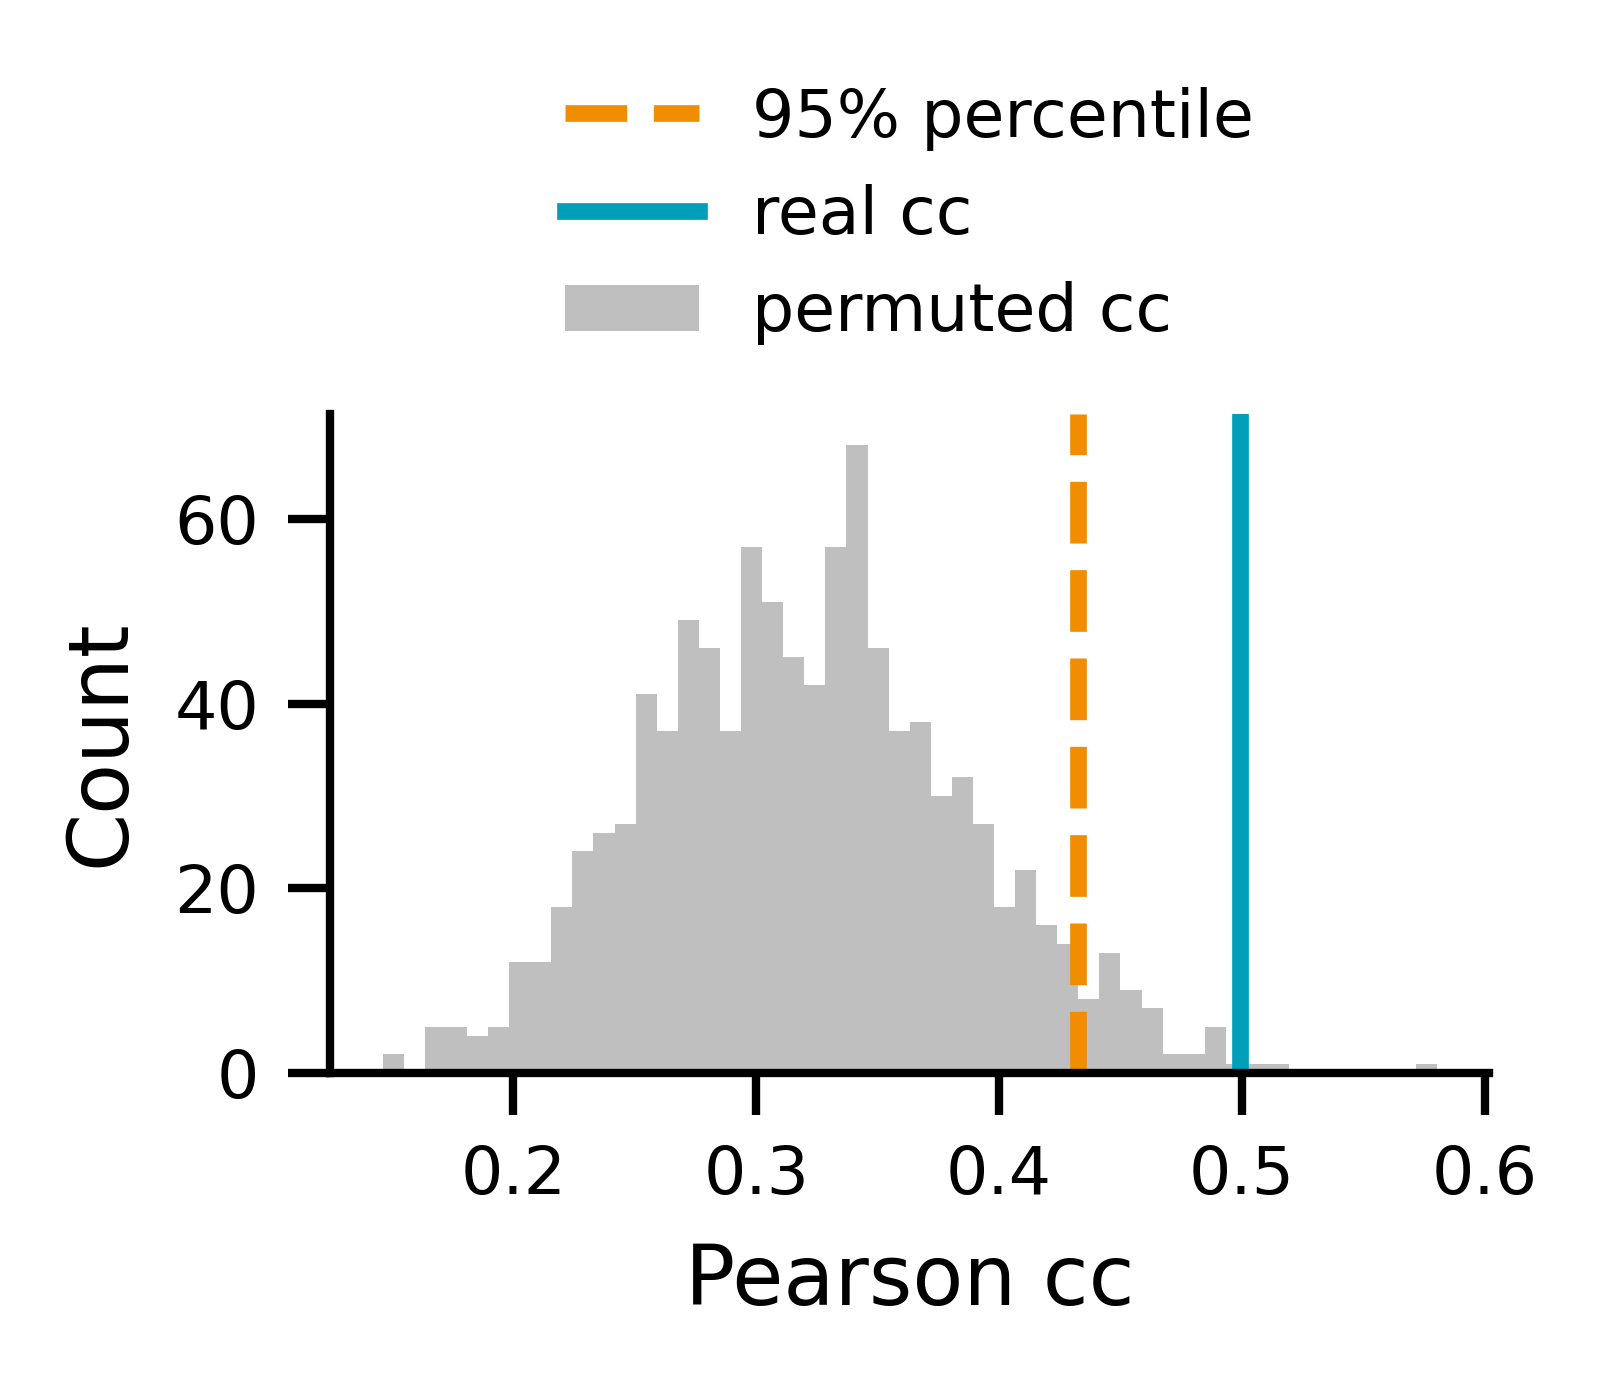

In [6]:
# permute 100 times
corr_list = []
p_list = []

for i in range(1000):
    corr, p = get_corrcoef_and_p(
        all_exponent_perday_concat, all_sweep_len_perday_concat, animal_names
    )
    corr_list.append(corr)
    p_list.append(p)

exp_np = np.concatenate(list(all_exponent_perday_concat.values()))
sweep_len_np = np.concatenate(list(all_sweep_amp_perday_concat.values()))
corr_real, p_real = pearsonr(sweep_len_np, exp_np)

# plot the histgoram of corr_list and mark the 95 percentile as a vertical dashed line
# as well as the corr_real as a vertical solid line
fig, ax = plt.subplots(figsize=(3, 3), dpi=300)
labelsize = 10
ticksize = 8

ax.hist(
    corr_list, bins=50, color="grey", alpha=0.5, edgecolor="none", label="permuted cc"
)

ax.axvline(
    np.percentile(corr_list, 95),
    color="#F18D00",
    linestyle="dashed",
    linewidth=2,
    label="95% percentile",
)
ax.axvline(corr_real, color="#009FB9", linestyle="solid", linewidth=2, label="real cc")
ax.set_xlabel("Pearson cc", fontsize=labelsize)
ax.set_ylabel("Count", fontsize=labelsize)
# top and right spine should be invisible
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
# legend
ax.legend(fontsize=ticksize, frameon=False, loc="center", bbox_to_anchor=(0.5, 1.3))
#
# axis line width 1.0
ax.spines["bottom"].set_linewidth(1.0)
ax.spines["left"].set_linewidth(1.0)
# remove the tick bars on the left and bottom linewidth=1.0
ax.tick_params(axis="both", which="both", length=5, width=1.0)
# set ticks fontsize
ax.tick_params(axis="both", which="major", labelsize=ticksize)

plt.tight_layout()
# # save fig
# savedir = "/home/zilong/Desktop/replay_trajectory_paper/Processed-Data/Paper_figures/"
# fig.savefig(
#     savedir + "FigSI_sweep_replay_correlation_acrossday_shuffle.pdf",
# )

### add an shuffle example

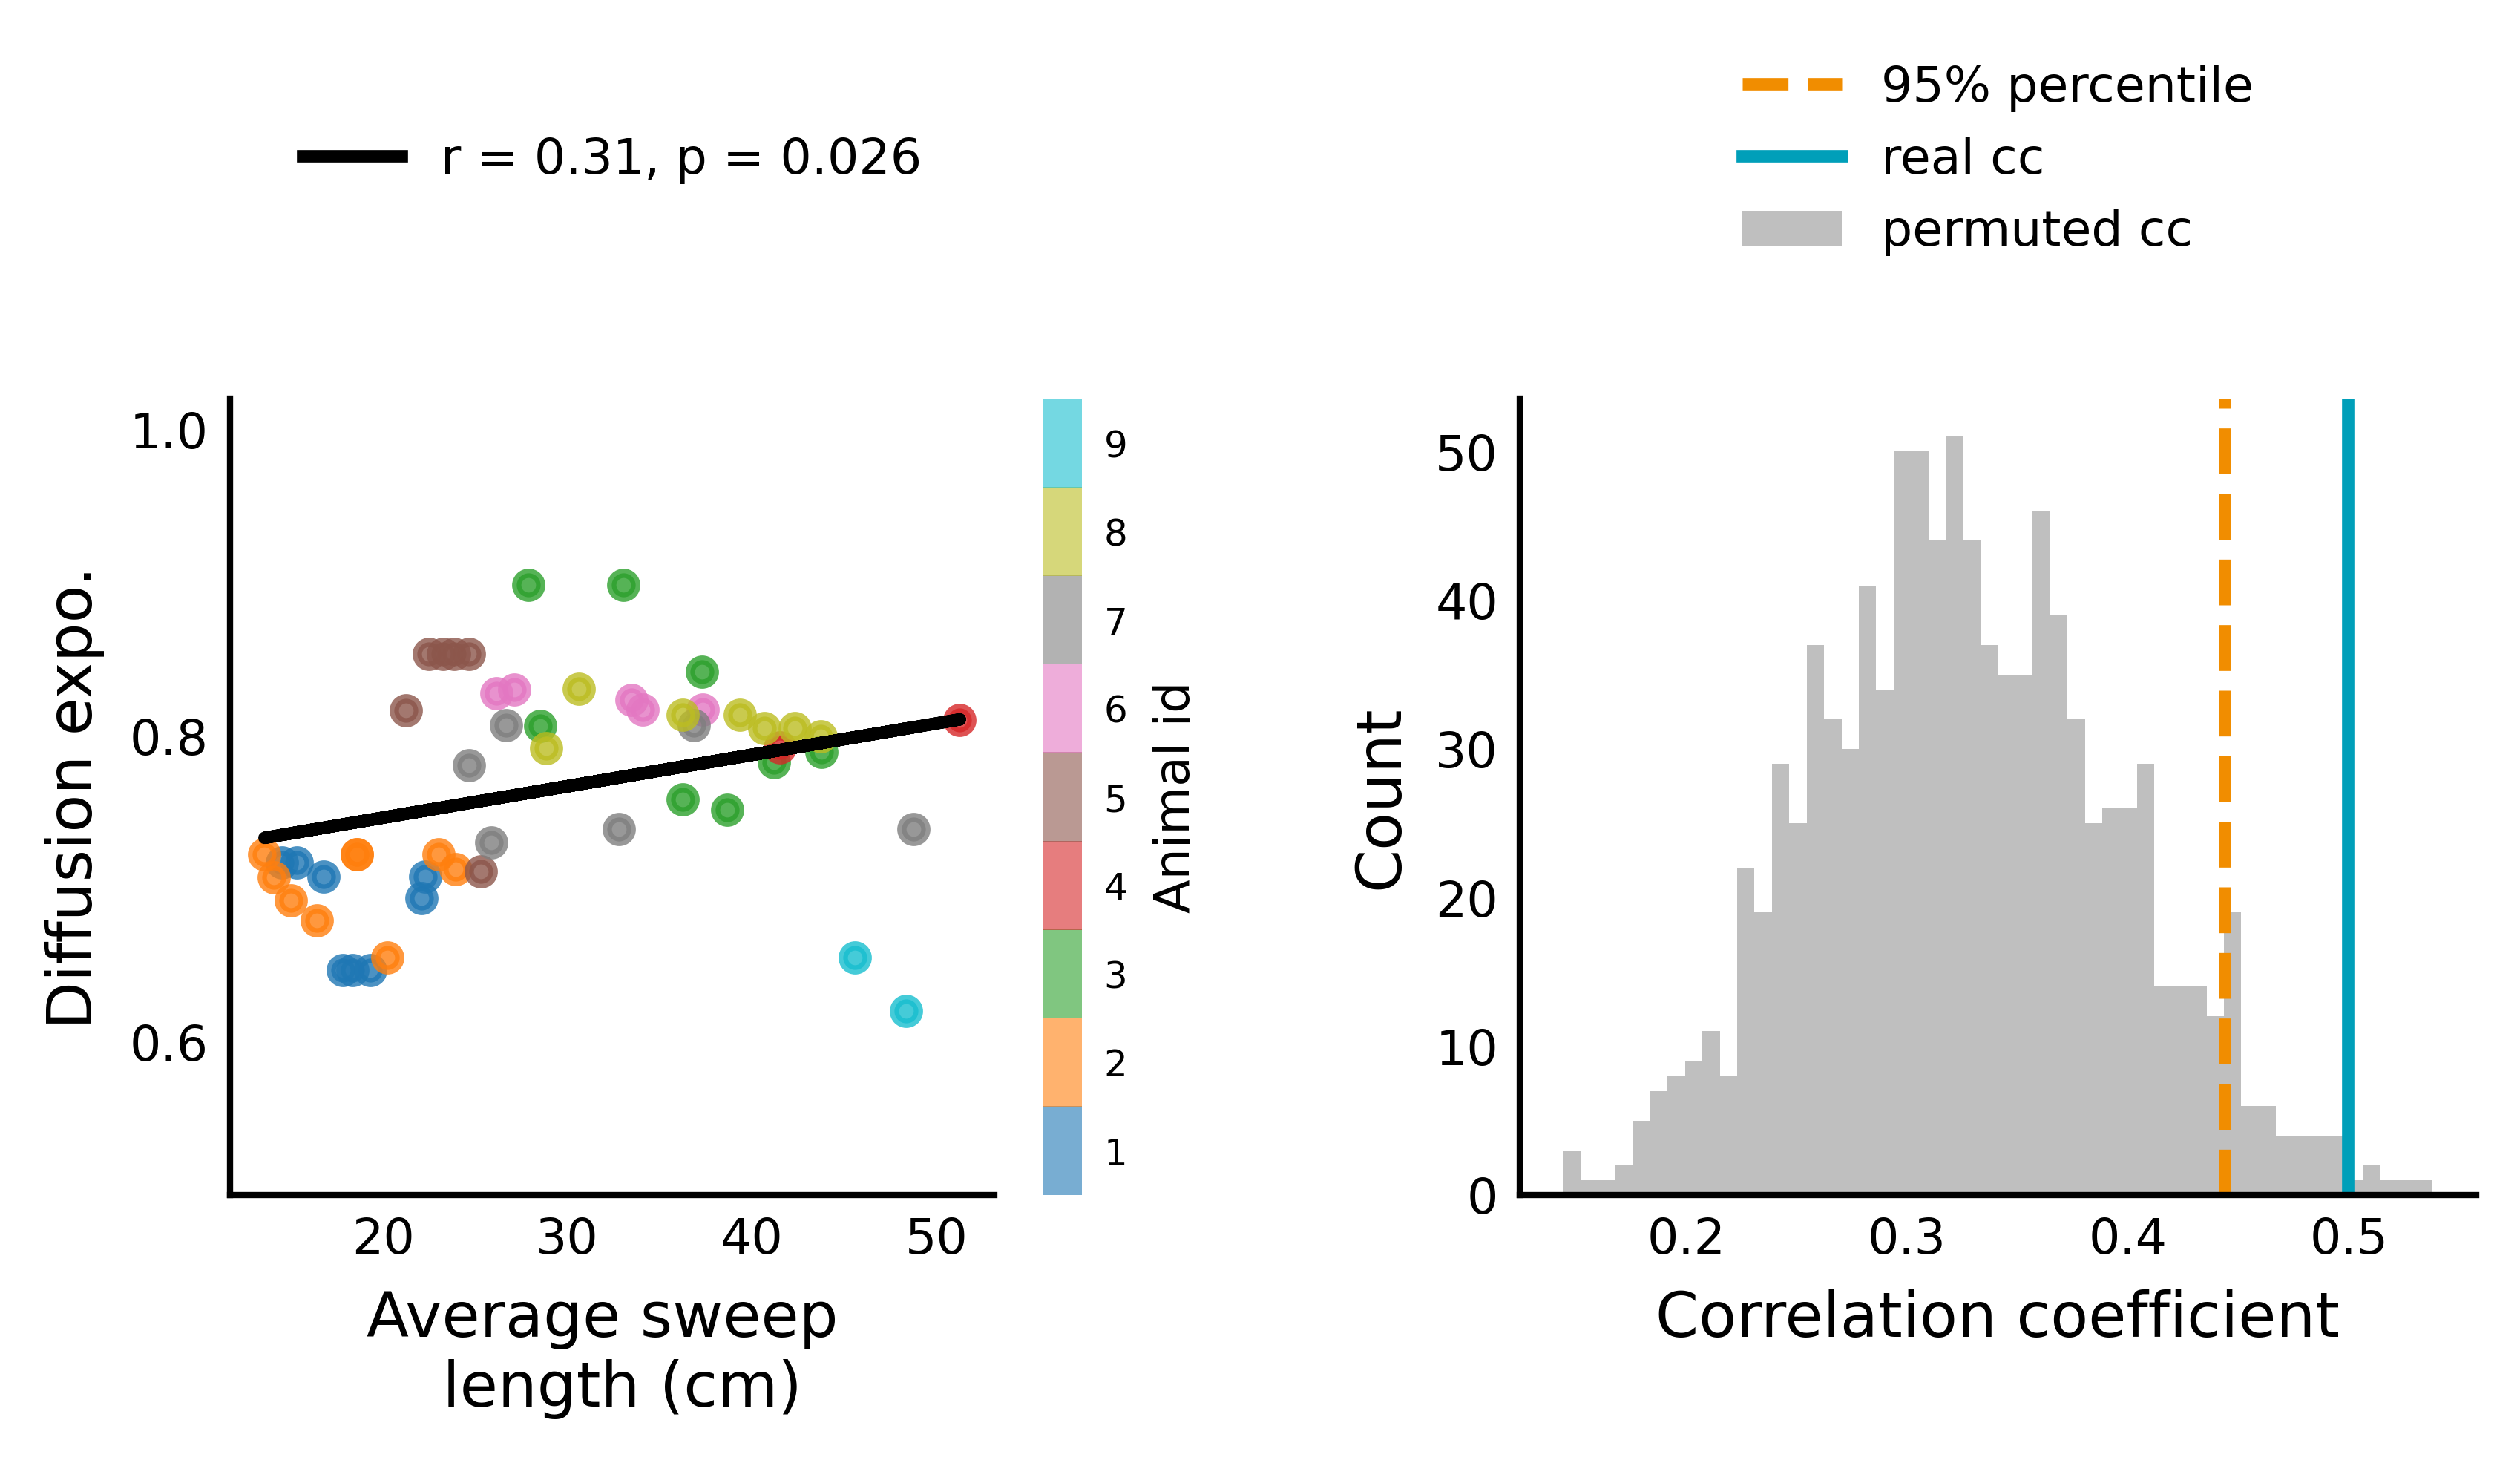

In [72]:
# set random seed for reproducibility
random.seed(1)

# get the color for each animal
colors = plt.cm.get_cmap("tab10", len(animal_names))
color_dict = {}
for i, name in enumerate(animal_names):
    color_dict[name] = colors(i)

# for each key in all_exponent_perday_concat, shuffle the values in the list
# store the shuffled values in a new dictionary
all_exponent_perday_concat_shuffled = {}
# for key in all_exponent_perday_concat.keys():
#     all_exponent_perday_concat_shuffled[key] = np.random.permutation(
#         all_exponent_perday_concat[key]
#     )
for key in all_exponent_perday_concat.keys():
    exp_key = all_exponent_perday_concat[key]
    exp_key_copy = exp_key.copy()
    # for each elemet in exp_key, replace it with another element in exp_key
    for i in range(len(exp_key_copy)):
        exp_key_except_i = exp_key[:i] + exp_key[i + 1 :]
        exp_key_copy[i] = random.choice(exp_key_except_i)
    all_exponent_perday_concat_shuffled[key] = exp_key_copy

# copy all_sweep_len_perday_concat to a new dictionary
all_sweep_len_perday_concat_shuffled = all_sweep_len_perday_concat.copy()

# plot all_exponent_perday_concat_shuffled against all_sweep_len_perday_concat_shuffled
fig = plt.figure(figsize=(6, 4), dpi=300)
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])

labelsize = 10
ticksize = 8

# plot an shuffle example
ax1 = fig.add_subplot(gs[0, 0])
for name in animal_names:
    ax1.scatter(
        np.array(all_sweep_len_perday_concat_shuffled[name]),
        np.array(all_exponent_perday_concat_shuffled[name]),
        s=15,
        alpha=0.8,
        color=color_dict[name],
    )
# add linear fit line to the plot using numpy.polyfit
# convert all_sweep_len_perday_concat_shuffled and all_exponent_perday_concat_shuffled to numpy array
exp_np = np.concatenate(list(all_exponent_perday_concat_shuffled.values()))
sweep_len_np = np.concatenate(list(all_sweep_len_perday_concat_shuffled.values()))
slope, intercept = np.polyfit(sweep_len_np, exp_np, 1)
# pearson test
corr, p = pearsonr(sweep_len_np, exp_np)
ax1.plot(
    sweep_len_np,
    sweep_len_np * slope + intercept,
    "k-",
    label="r = %.2f, p = %.3f" % (corr, p),
    linewidth=2,
)


# legend
ax1.legend(fontsize=ticksize, frameon=False, loc="center", bbox_to_anchor=(0.5, 1.3))

# add colorbar with alpha 0.8
cmap = ListedColormap(color_dict.values())
# Create a ScalarMappable with the colormap and normalize it
sm = ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=len(color_dict)))
# Set the colorbar properties
cbar = plt.colorbar(sm, ax=ax1, ticks=list(range(len(color_dict))), alpha=0.6)
# Set colorbar ticks by adding 1 to each tick
ticks = list(range(len(color_dict)))
cbar.set_ticks([tick + 0.5 for tick in ticks])
# set tick labels by adding 1 to each tick
cbar.set_ticklabels(list(range(1, len(color_dict) + 1)))
# Set colorbar ticklabels by adding 1 to each tick
# Set colorbar label
cbar.set_label("Animal id", fontsize=ticksize)
# remove the box of the colorbar
cbar.outline.set_visible(False)
# set colobar tick label size as ticksize
cbar.ax.tick_params(labelsize=6, size=0)

ax1.set_xlabel("Average sweep \n length (cm)", fontsize=labelsize)
ax1.set_ylabel("Diffusion expo.", fontsize=labelsize)
ax1.set_yticks([0.6, 0.8, 1.0])
ax1.set_ylim(0.5, 1.02)

# top and right spine off
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
# axis line width 1.0
ax1.spines["bottom"].set_linewidth(1.0)
ax1.spines["left"].set_linewidth(1.0)
# remove the tick bars on the left and bottom
ax1.tick_params(axis="both", which="both", length=0)
ax1.tick_params(labelsize=ticksize)

# plot 1000 shuffles
# permute 100 times
corr_list = []
p_list = []

for i in range(1000):
    corr, p = get_corrcoef_and_p(
        all_exponent_perday_concat, all_sweep_len_perday_concat, animal_names
    )
    corr_list.append(corr)
    p_list.append(p)

exp_np = np.concatenate(list(all_exponent_perday_concat.values()))
sweep_len_np = np.concatenate(list(all_sweep_amp_perday_concat.values()))
corr_real, p_real = pearsonr(sweep_len_np, exp_np)

ax2 = fig.add_subplot(gs[0, 1])

ax2.hist(
    corr_list, bins=50, color="grey", alpha=0.5, edgecolor="none", label="permuted cc"
)

ax2.axvline(
    np.percentile(corr_list, 95),
    color="#F18D00",
    linestyle="dashed",
    linewidth=2,
    label="95% percentile",
)
ax2.axvline(corr_real, color="#009FB9", linestyle="solid", linewidth=2, label="real cc")
ax2.set_xlabel("Correlation coefficient", fontsize=labelsize)
ax2.set_ylabel("Count", fontsize=labelsize)
# top and right spine should be invisible
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
# legend
ax2.legend(fontsize=ticksize, frameon=False, loc="center", bbox_to_anchor=(0.5, 1.3))
#
# axis line width 1.0
ax2.spines["bottom"].set_linewidth(1.0)
ax2.spines["left"].set_linewidth(1.0)
# remove the tick bars on the left and bottom linewidth=1.0
ax2.tick_params(axis="both", which="both", length=5, width=1.0)
# set ticks fontsize
ax2.tick_params(axis="both", which="major", labelsize=ticksize)

for ax in [ax1, ax2]:
    ax.tick_params(labelsize=ticksize)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    # axis line width 1.0
    ax.spines["bottom"].set_linewidth(1.0)
    ax.spines["left"].set_linewidth(1.0)
    # remove the tick bars on the left and bottom
    ax.tick_params(axis="both", which="both", length=0)

plt.tight_layout()
# save fig
savedir = "/home/zilong/Desktop/replay_trajectory_paper/Processed-Data/Paper_figures/"
fig.savefig(
    savedir + "Fig_SI_sweep_replay_correlation_acrossday_shuffle.pdf",
)

In [8]:
# using one-sample Kolmogorov-Smirnov test to test whether the distribution of the real data is different from the distribution of the shuffled data
from scipy.stats import ks_2samp

ks_2samp(corr_list, [corr_real])

KstestResult(statistic=0.994, pvalue=0.013986013986013957)

### merge all data for one animal and plot the correlation between sweeps and replay


(0.5, 1.0)

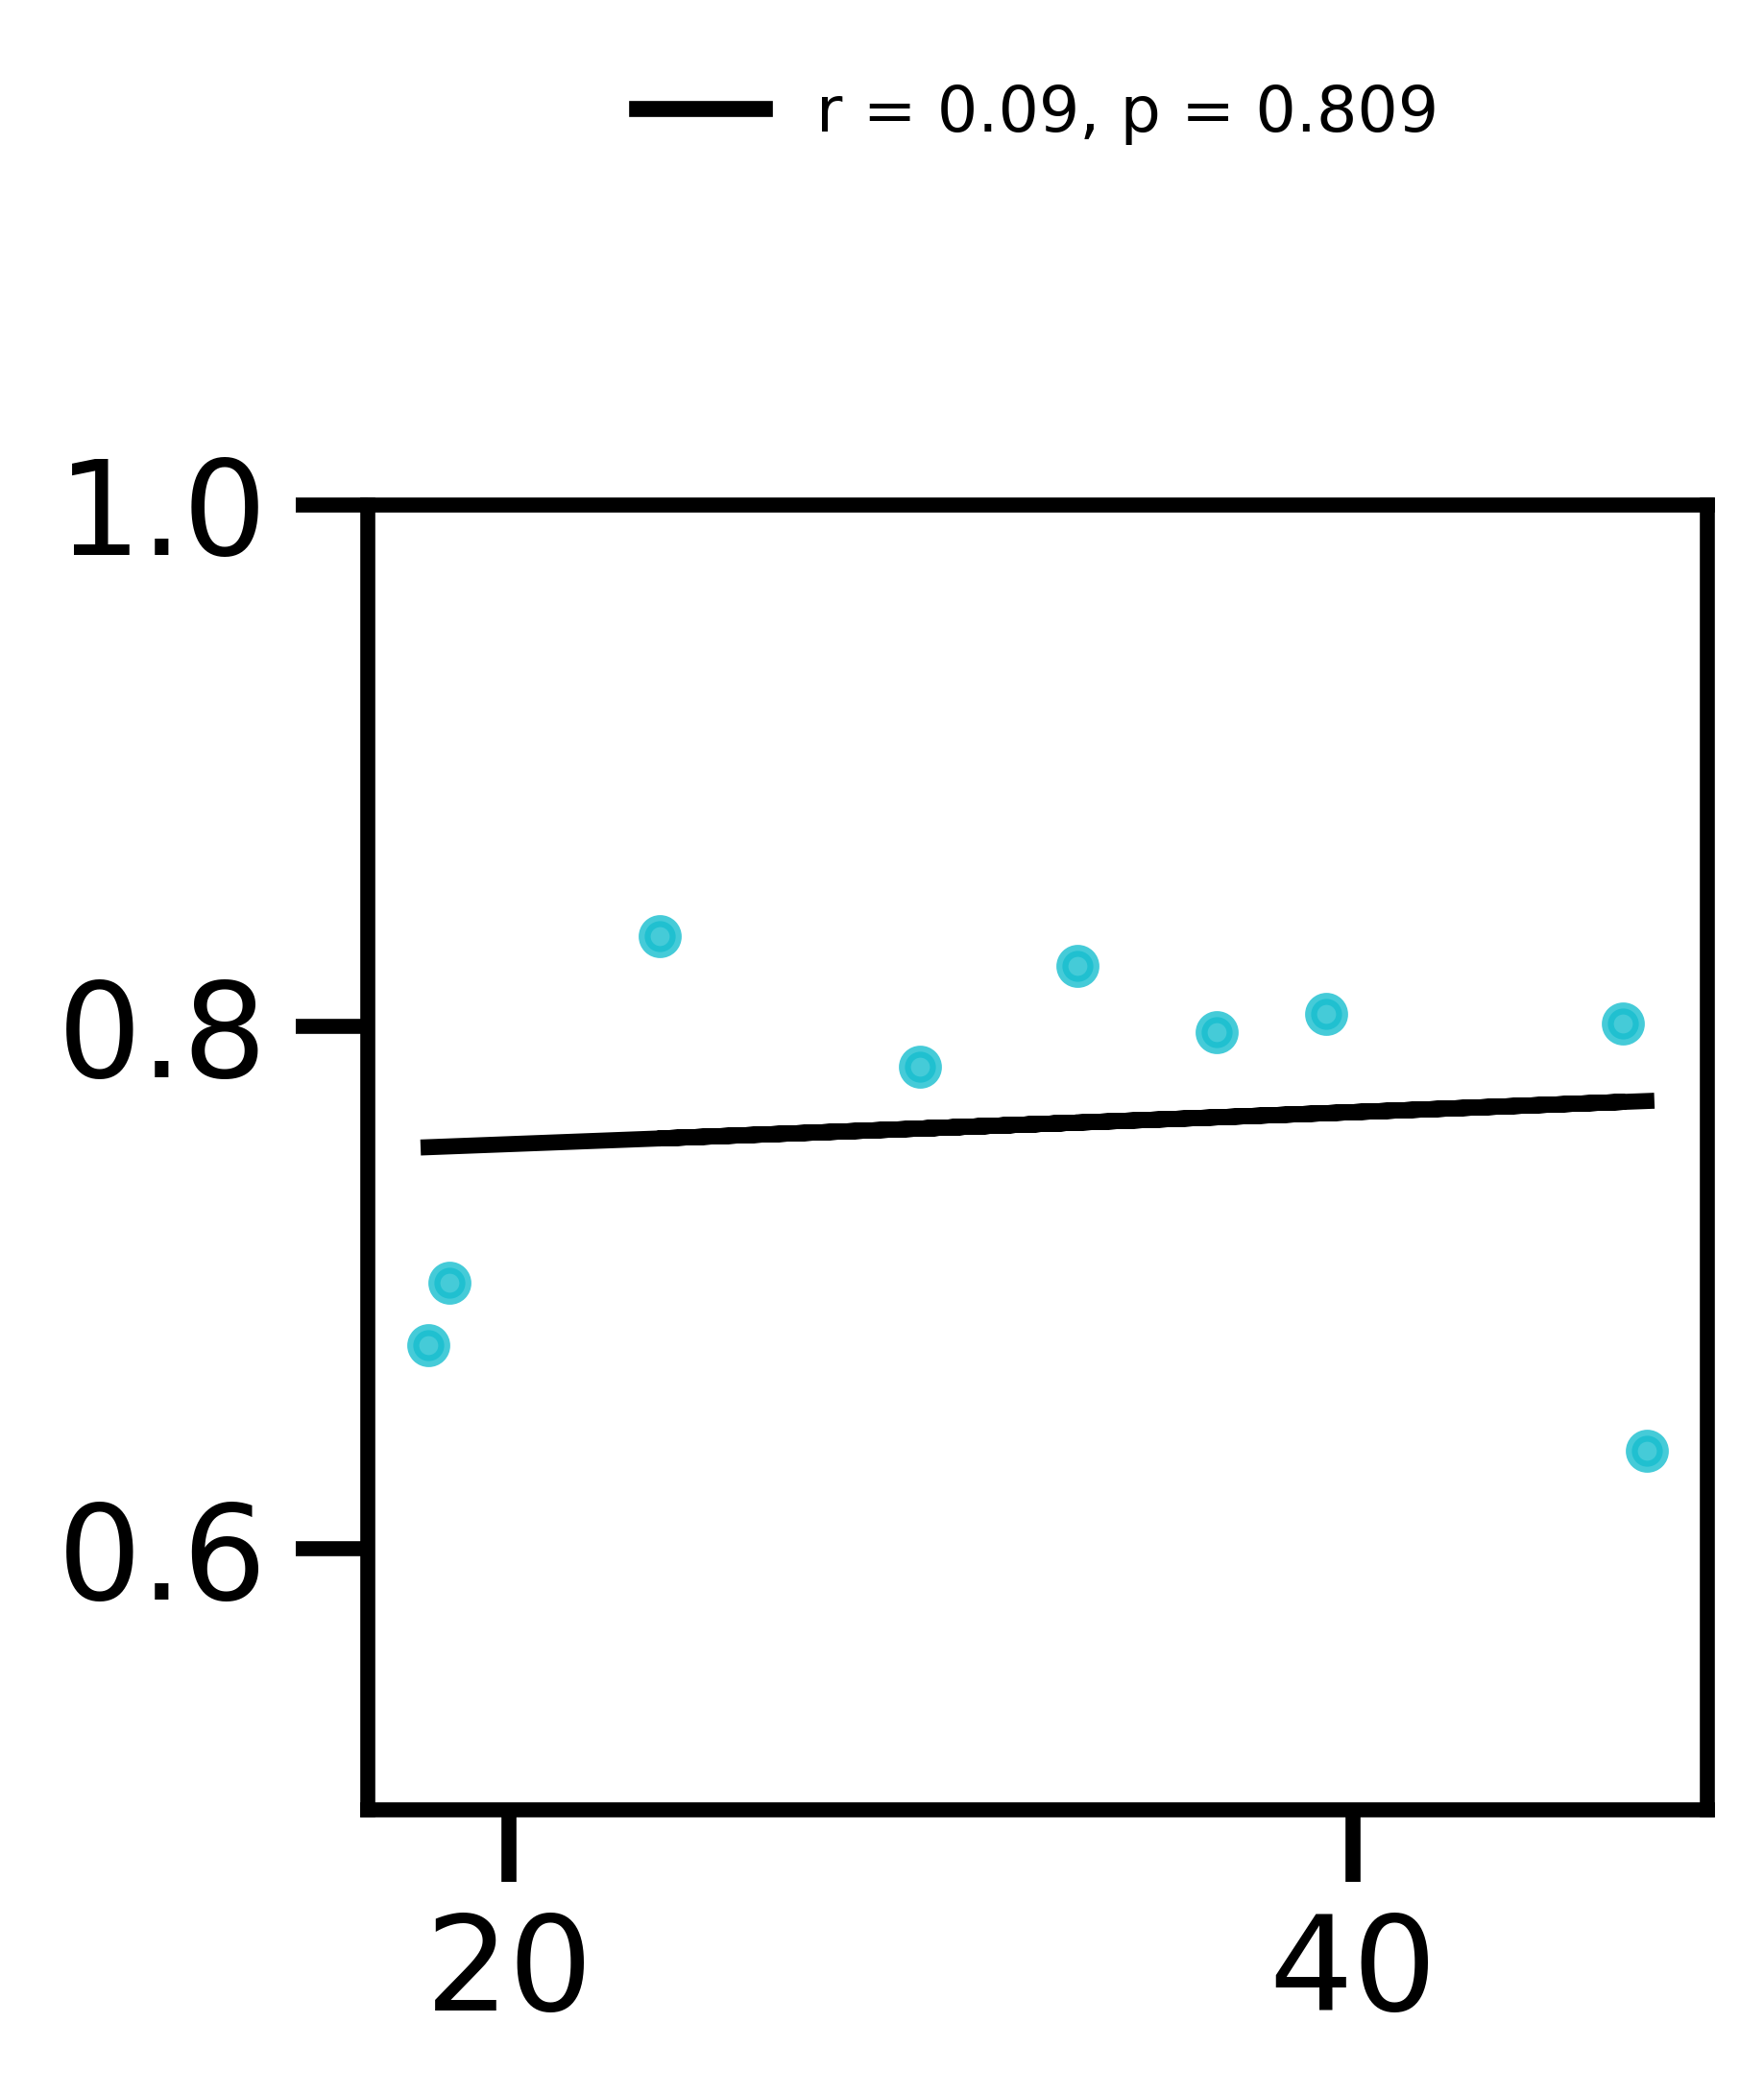

In [40]:
# merge data from one animal and plot the correlation between sweep length and exponent

# get the color for each animal
colors = plt.cm.get_cmap("tab10", len(animal_names))

color_dict = {}
for i, name in enumerate(animal_names):
    color_dict[name] = colors(i)

# merge data from one animal
sweep_length = []
replay_diffusion = []

for name in animal_names:
    sweep_length.append(np.median(all_sweep_len_perday_concat[name]))
    replay_diffusion.append(np.median(all_exponent_perday_concat[name]))

sweep_length = np.array(sweep_length)
replay_diffusion = np.array(replay_diffusion)

# plot the correlation between sweep length and exponent
fig, ax = plt.subplots(figsize=(3, 3), dpi=300)
labelsize = 10
ticksize = 8

ax.scatter(
    sweep_length,
    replay_diffusion,
    s=15,
    alpha=0.8,
    color=color_dict[name],
)

# add linear fit line to the plot using numpy.polyfit
# convert all_sweep_len_perday_concat_shuffled and all_exponent_perday_concat_shuffled to numpy array
slope, intercept = np.polyfit(sweep_length, replay_diffusion, 1)
# pearson test
corr, p = pearsonr(sweep_length, replay_diffusion)
ax.plot(
    sweep_length,
    sweep_length * slope + intercept,
    "k-",
    label="r = %.2f, p = %.3f" % (corr, p),
    linewidth=2,
)

# legend
ax.legend(fontsize=ticksize, frameon=False, loc="center", bbox_to_anchor=(0.5, 1.3))

ax.set_ylim(0.5, 1.0)

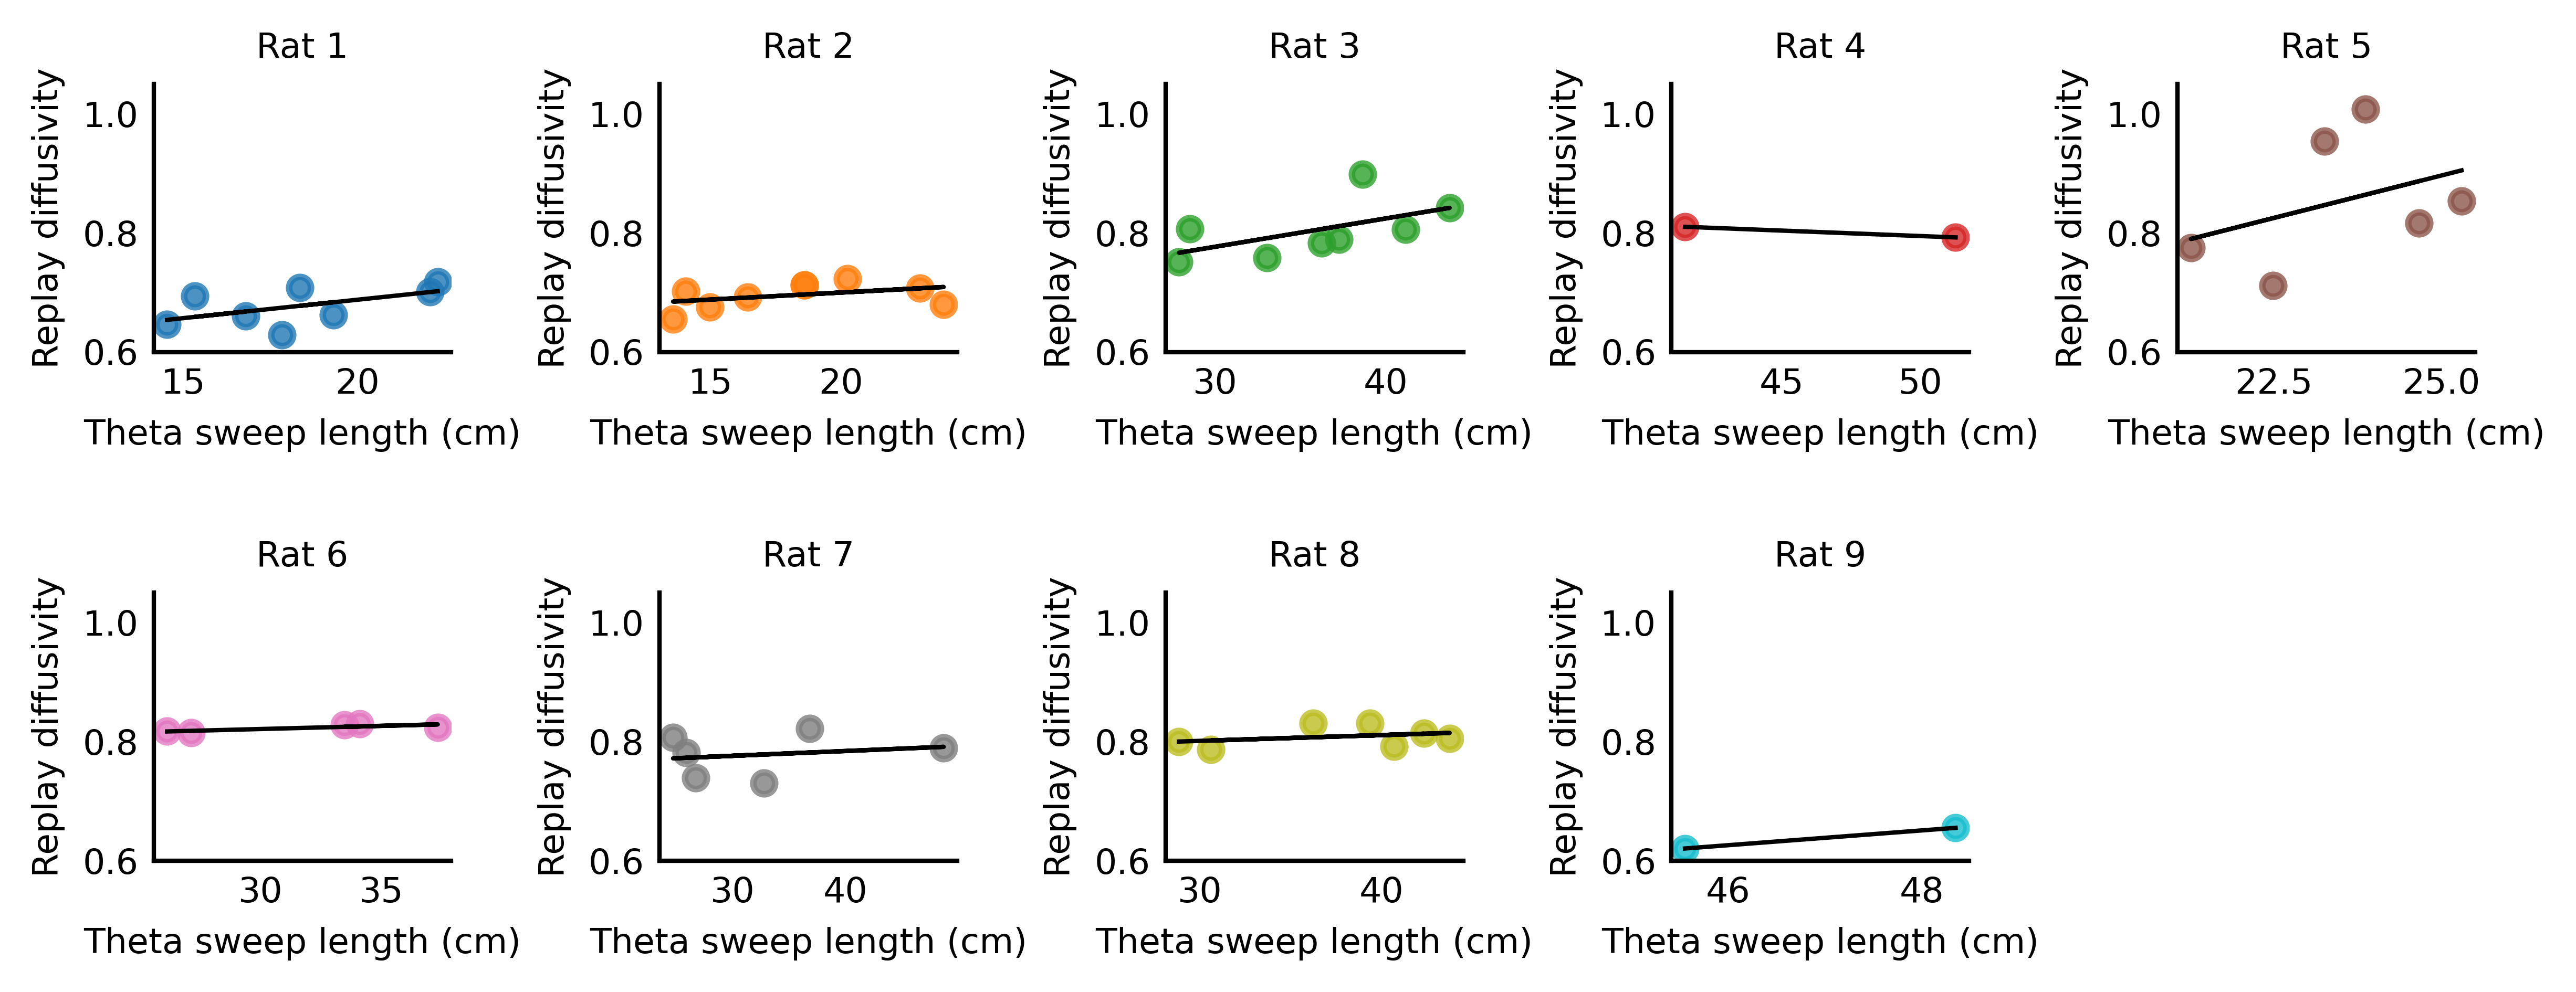

In [71]:
# for each animal plot the correlation between sweep length and exponent in different subplot
fig, axes = plt.subplots(2, 5, figsize=(8.3, 3.5), dpi=300)
labelsize = 8
ticksize = 8

for i, name in enumerate(animal_names):
    ax = axes.flatten()[i]

    sweep = all_sweep_len_perday_concat[name]
    # to list
    sweep = [sweep[j].item() for j in range(len(sweep))]
    sweep = np.array(sweep)

    exponent = all_exponent_perday_concat[name]
    # to list
    exponent = [exponent[j].item() for j in range(len(exponent))]
    exponent = np.array(exponent)

    ax.scatter(
        sweep,
        exponent,
        s=25,
        alpha=0.8,
        color=color_dict[name],
    )

    # add linear fit line to the plot using numpy.polyfit
    # convert all_sweep_len_perday_concat_shuffled and all_exponent_perday_concat_shuffled to numpy array
    slope, intercept = np.polyfit(sweep, exponent, 1)

    # pearson test
    corr, p = pearsonr(sweep, exponent)
    ax.plot(
        sweep,
        sweep * slope + intercept,
        "k-",
        linewidth=1,
    )
    # # add text of r and p value
    # ax.text(
    #     0.02,
    #     0.9,
    #     "r = %.2f, p = %.3f" % (corr, p),
    #     fontsize=ticksize - 2,
    #     transform=ax.transAxes,
    # )
    # ax.legend(fontsize=ticksize, frameon=False, loc="center", bbox_to_anchor=(0.5, 0.9))
    ax.set_title("Rat " + str(i + 1), fontsize=labelsize)
    ax.set_ylim(0.6, 1.05)
    ax.set_yticks([0.6, 0.8, 1.0])
    ax.set_xlabel("Theta sweep length (cm)", fontsize=labelsize)
    ax.set_ylabel("Replay diffusivity", fontsize=labelsize)

    # top and right spine off
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    # axis line width 1.0
    ax.spines["bottom"].set_linewidth(1.0)

    ax.spines["left"].set_linewidth(1.0)

    # remove the tick bars on the left and bottom
    ax.tick_params(axis="both", which="both", length=0)
    ax.tick_params(labelsize=ticksize)

# remove the last subplot
axes[1, 4].axis("off")

plt.tight_layout()

# save the figure to /home/zilong/Desktop/replay_trajectory_paper/Processed-Data/Paper_figures/
savedir = "/home/zilong/Desktop/replay_trajectory_paper/Processed-Data/Paper_figures/"

savename = "Fig_SI_theta_vs_replay_each_animal.pdf"
plt.savefig(savedir + savename, dpi=300, bbox_inches="tight")

## check the correlation per recording epoch (more data but more noisy)

In [17]:
with open(
    "../../Processed-Data/sweep_replay_correlation_realdata_persession.pkl", "rb"
) as f:
    (
        animal_names,
        all_sweep_len_peranimal,
        all_sweep_amp_peranimal,
        all_sweep_ahead_peranimal,
        all_sweep_behind_peranimal,
        all_exponent_peranimal,
        all_ave_activespeed_peranimal,
    ) = pickle.load(f)

(0.5, 1.0)

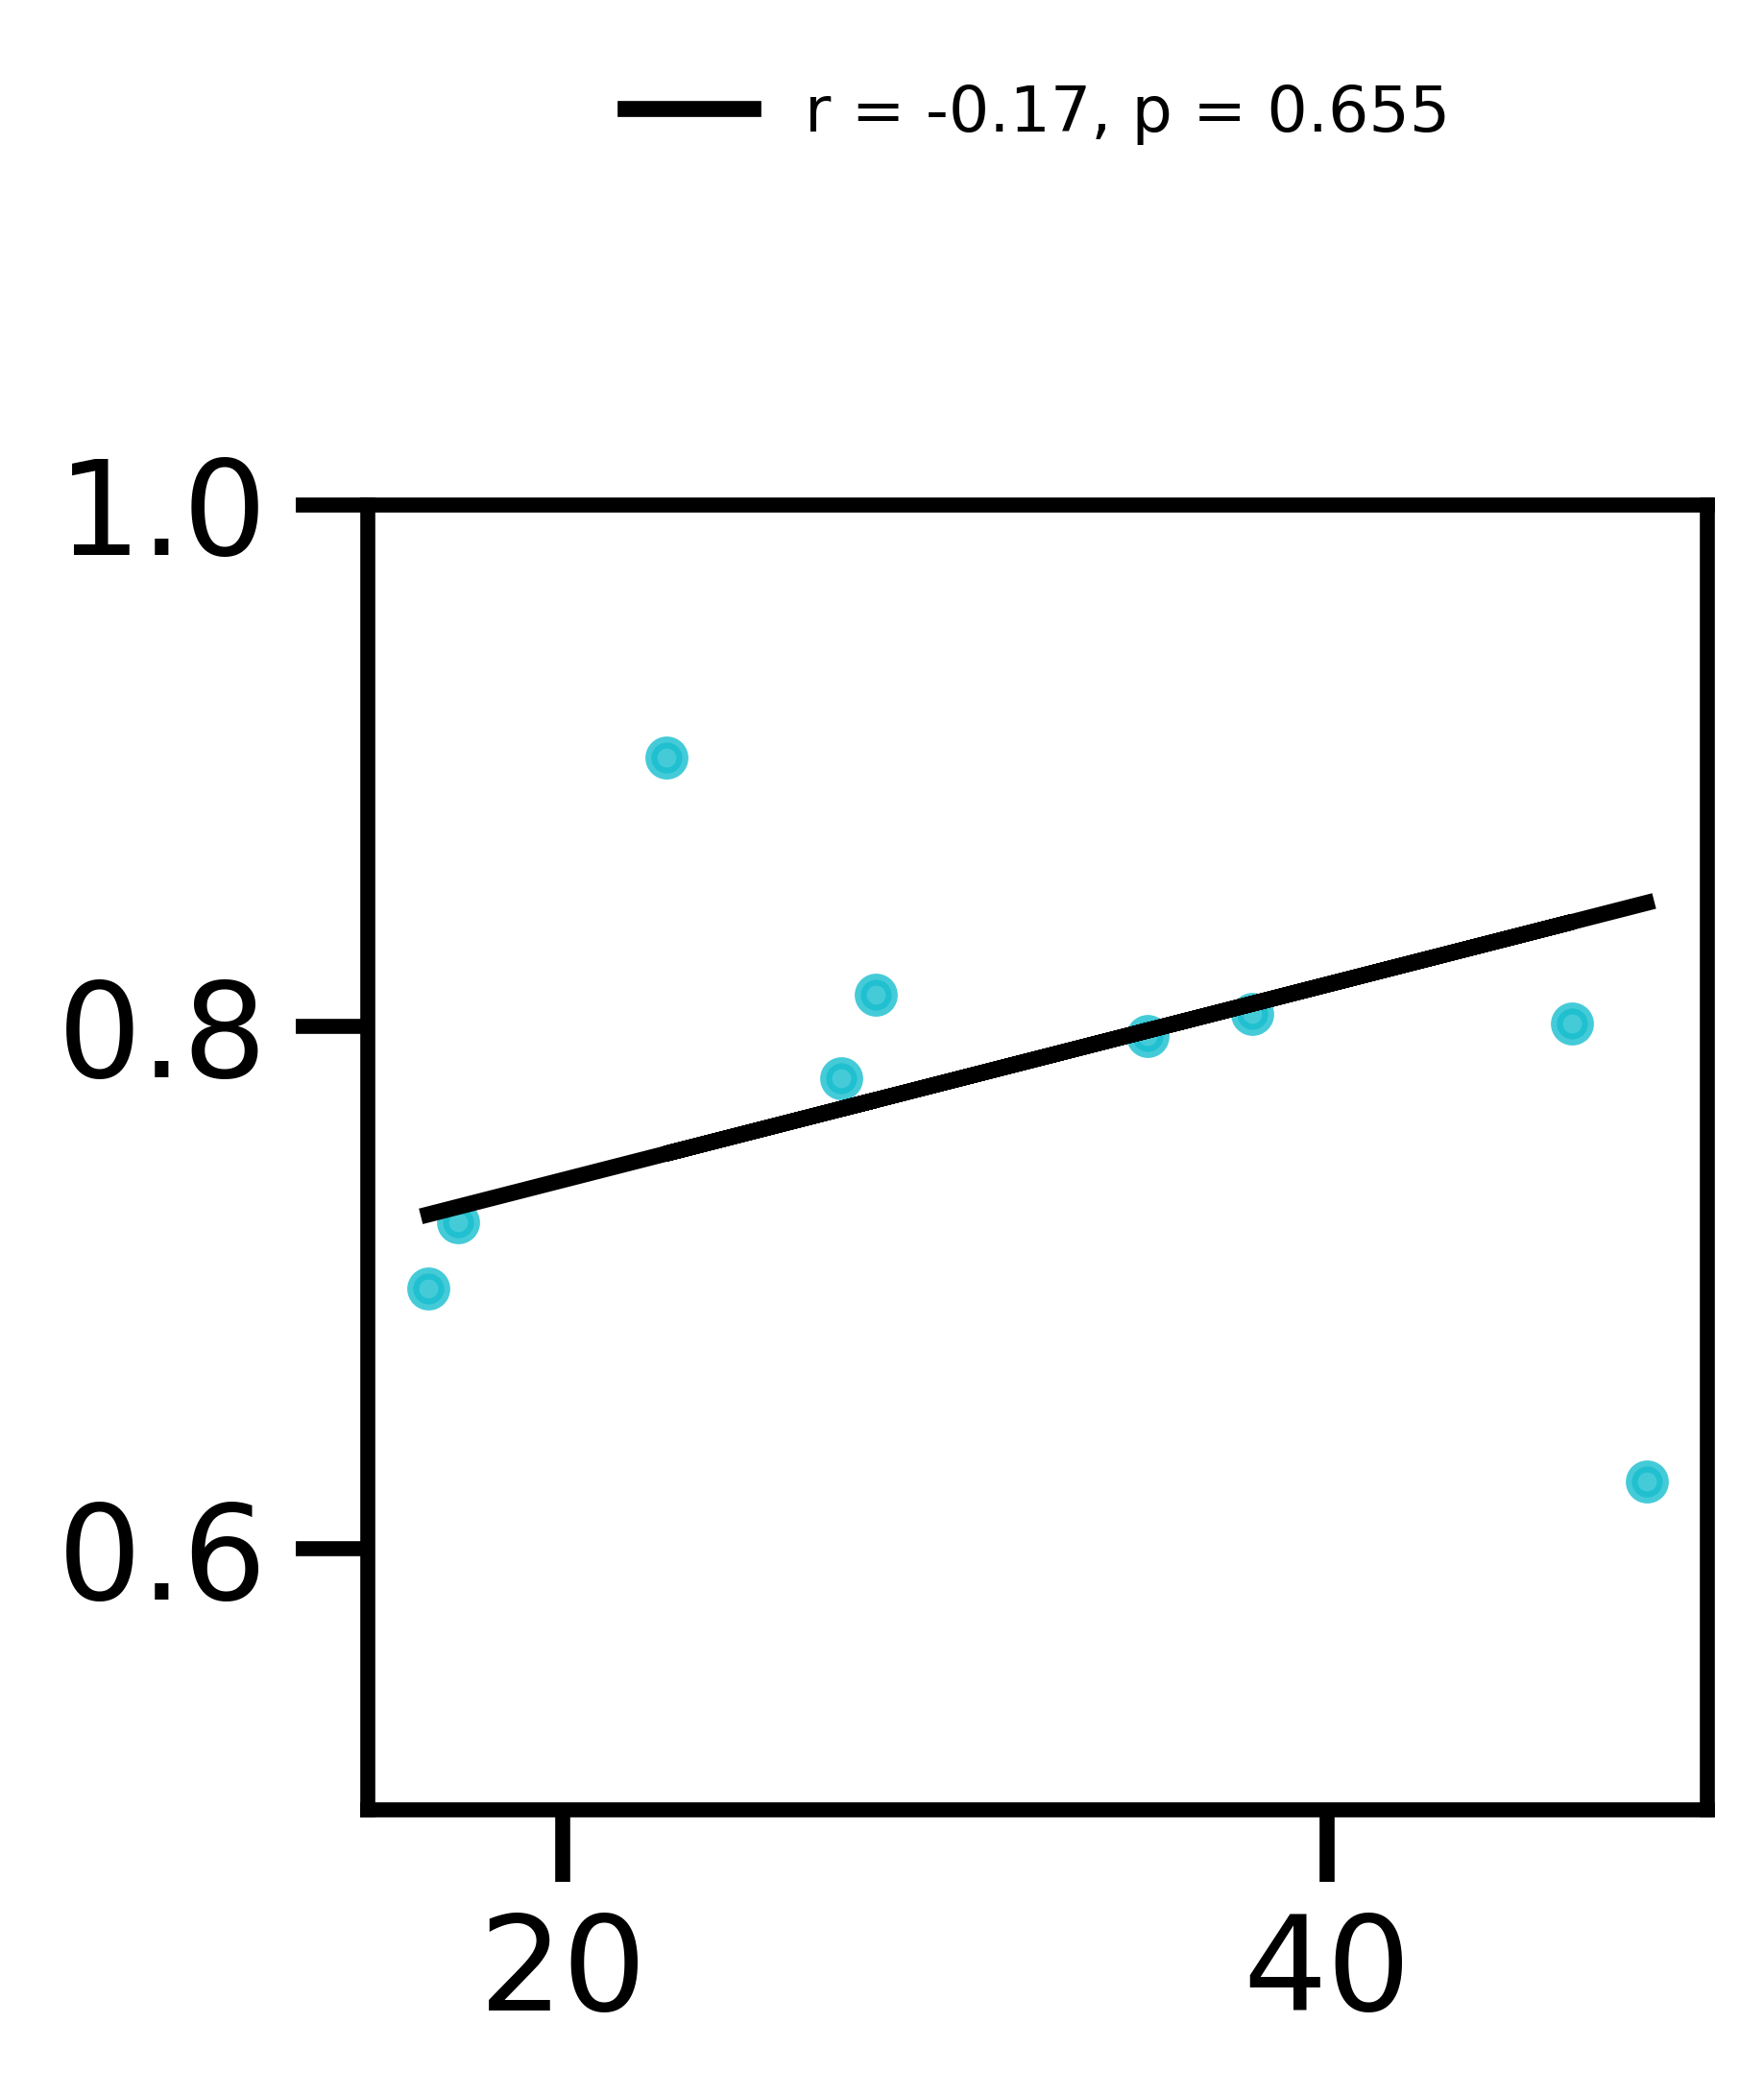

In [31]:
# animal_names,
# all_sweep_len_perday_concat,
# all_sweep_amp_perday_concat,
# all_sweep_ahead_perday_concat,
# all_sweep_behind_perday_concat,
# all_exponent_perday_concat,
# all_ave_activespeed_perday_concat,

# merge data from one animal and plot the correlation between sweep length and exponent
from sklearn.linear_model import RANSACRegressor

# get the color for each animal
colors = plt.cm.get_cmap("tab10", len(animal_names))

color_dict = {}
for i, name in enumerate(animal_names):
    color_dict[name] = colors(i)

# merge data from one animal
sweep_length = []
replay_diffusion = []

for name in animal_names:
    sweep_length.append(np.median(all_sweep_len_peranimal[name]))
    replay_diffusion.append(np.median(all_exponent_peranimal[name]))

sweep_length = np.array(sweep_length)
replay_diffusion = np.array(replay_diffusion)

# plot the correlation between sweep length and exponent
fig, ax = plt.subplots(figsize=(3, 3), dpi=300)
labelsize = 10
ticksize = 8

ax.scatter(
    sweep_length,
    replay_diffusion,
    s=15,
    alpha=0.8,
    color=color_dict[name],
)

# add linear fit line to the plot using numpy.polyfit
# convert all_sweep_len_perday_concat_shuffled and all_exponent_perday_concat_shuffled to numpy array
# slope, intercept = np.polyfit(sweep_length, replay_diffusion, 1)
ransac = RANSACRegressor()
ransac.fit(sweep_length.reshape(-1, 1), replay_diffusion)
slope = ransac.estimator_.coef_[0]
intercept = ransac.estimator_.intercept_


# pearson test
corr, p = pearsonr(sweep_length, replay_diffusion)
ax.plot(
    sweep_length,
    sweep_length * slope + intercept,
    "k-",
    label="r = %.2f, p = %.3f" % (corr, p),
    linewidth=2,
)

# legend
ax.legend(fontsize=ticksize, frameon=False, loc="center", bbox_to_anchor=(0.5, 1.3))

ax.set_ylim(0.5, 1.0)

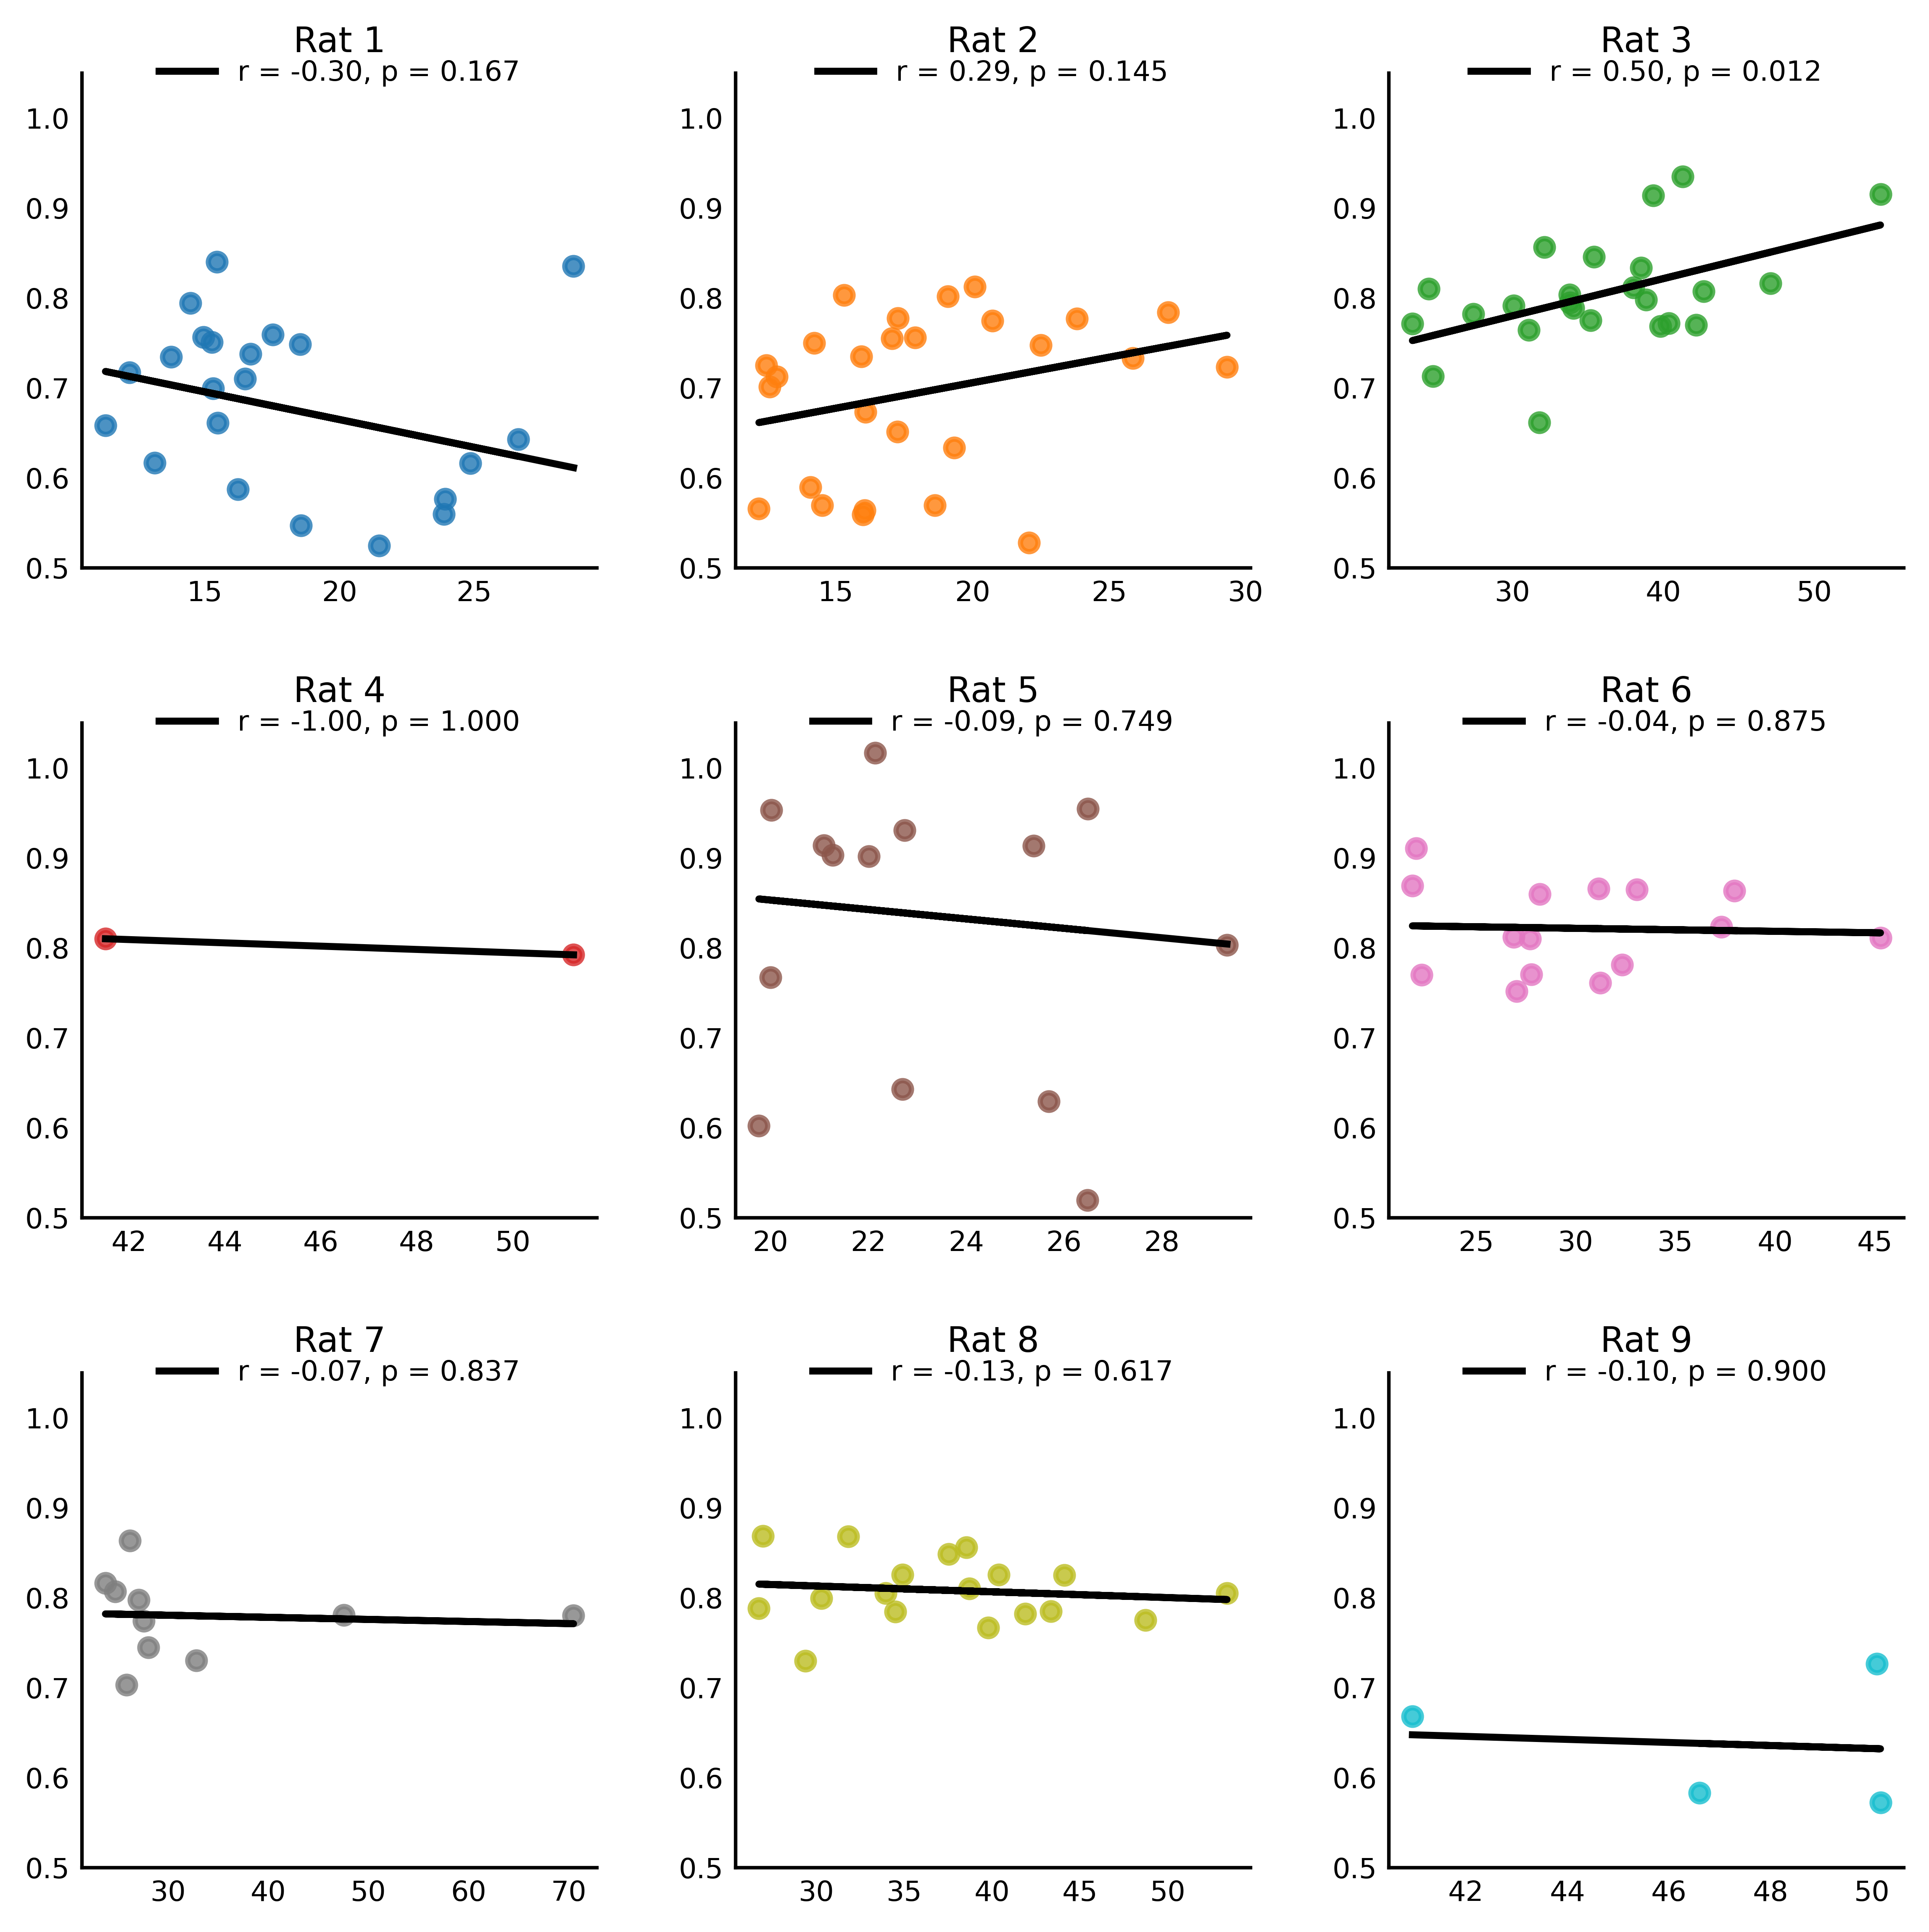

In [55]:
# for each animal plot the correlation between sweep length and exponent in different subplot
fig, axes = plt.subplots(3, 3, figsize=(8, 8), dpi=300)
labelsize = 10
ticksize = 8

for i, name in enumerate(animal_names):
    ax = axes.flatten()[i]

    sweep = all_sweep_len_peranimal[name]
    # to list
    sweep = [sweep[j].item() for j in range(len(sweep))]
    sweep = np.array(sweep)

    exponent = all_exponent_peranimal[name]
    # to list
    exponent = [exponent[j].item() for j in range(len(exponent))]
    exponent = np.array(exponent)

    ax.scatter(
        sweep,
        exponent,
        s=25,
        alpha=0.8,
        color=color_dict[name],
    )

    # add linear fit line to the plot using numpy.polyfit
    # convert all_sweep_len_perday_concat_shuffled and all_exponent_perday_concat_shuffled to numpy array
    slope, intercept = np.polyfit(sweep, exponent, 1)

    # ransac = RANSACRegressor()
    # ransac.fit(sweep.reshape(-1, 1), exponent)
    # slope = ransac.estimator_.coef_[0]
    # intercept = ransac.estimator_.intercept_

    # pearson test
    corr, p = pearsonr(sweep, exponent)
    ax.plot(
        sweep,
        sweep * slope + intercept,
        "k-",
        label="r = %.2f, p = %.3f" % (corr, p),
        linewidth=2,
    )

    ax.legend(fontsize=ticksize, frameon=False, loc="center", bbox_to_anchor=(0.5, 1.0))

    ax.set_title("Rat " + str(i + 1), fontsize=labelsize)
    ax.set_ylim(0.5, 1.05)

    # top and right spine off
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    # axis line width 1.0
    ax.spines["bottom"].set_linewidth(1.0)

    ax.spines["left"].set_linewidth(1.0)

    # remove the tick bars on the left and bottom
    ax.tick_params(axis="both", which="both", length=0)
    ax.tick_params(labelsize=ticksize)

plt.tight_layout()